## POLYNOMIAL REGRESSION FOR Mth ORDER

In [1]:
import numpy as np

In [2]:
#function that creates synthetic data
def createData(x, beta, noiseLevel):
    
    b0,b1,b2,b3,b4 = beta[0],beta[1],beta[2],beta[3],beta[4]
    
    noise = np.random.normal(-noiseLevel, noiseLevel, len(x))
    y_clear = b0 + b1*x + b2*(x**2) + b3*(x**3) + b4*(x**4)
    
    y = y_clear + noise

    return y

In [3]:
#Create the first data
n1 = 150
xRange_1 = 8
x_1 = np.random.uniform(-xRange_1, xRange_1, n1)

noiseLevel_1 = 50
beta_1 = np.array([5, 6, -20, 3, 2])
y_1 = createData(x_1, beta_1, noiseLevel_1)

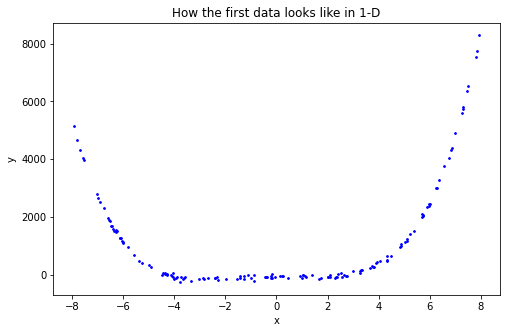

In [4]:
#See how the first data looks like
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(x_1, y_1, s = 3, color='blue')
plt.title('How the first data looks like in 1-D')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
#Create the second data
n2 = 100
xRange_2 = 7.5
x_2 = np.random.uniform(-xRange_2, xRange_2, n2)

noiseLevel_2 = 25
beta_2 = np.array([11, 2, -19, 2.5, 2.1])
y_2 = createData(x_2, beta_2, noiseLevel_2)

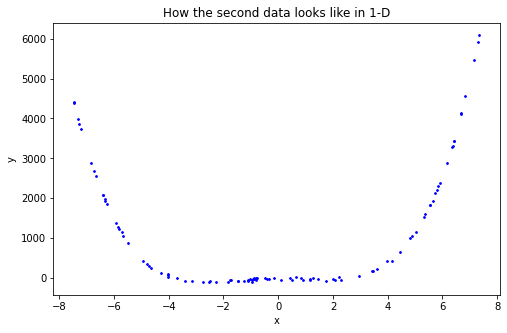

In [6]:
##See how the second data looks like
plt.figure(figsize=(8, 5))
plt.scatter(x_2, y_2, s = 3, color='blue')
plt.title('How the second data looks like in 1-D')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# n = n1+n2

In [8]:
# concatenate the datasets created
x = np.concatenate((x_1, x_2), axis=0)
y = np.concatenate((y_1, y_2), axis=0)

In [9]:
#shuffle them
from sklearn.utils import shuffle
x, y = shuffle(x, y, random_state=0)

print(x.shape)
print(y.shape)

(250,)
(250,)


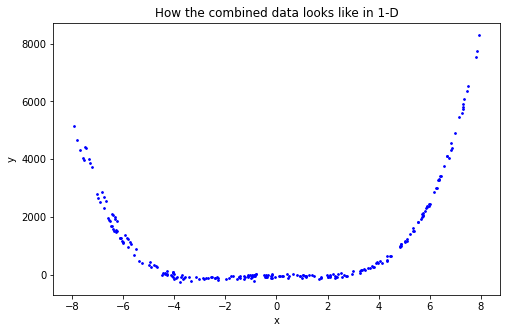

In [10]:
#How the combined data looks like
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s = 3, color='blue')
plt.title('How the combined data looks like in 1-D')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Model Selection

### Train-Test-Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [13]:
print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (187,)
x_test.shape =  (63,)
y_train.shape =  (187,)
y_test.shape =  (63,)


In [14]:
#Finding the best order for polynomial regression
M = len(beta_1)-1

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math 

m_range = range(1, 5*M, 2)

# Testing and Testing errors
training_errors=[]
testing_errors=[]

best_m = 0
minError = math.inf

for m in m_range:
    poly = PolynomialFeatures(degree=m)
    x_train_mapped = poly.fit_transform(x_train[:,np.newaxis])
    x_test_mapped = poly.fit_transform(x_test[:,np.newaxis])
    
    regressor = LinearRegression()
    regressor.fit(x_train_mapped, y_train)

    y_train_hat = regressor.predict(x_train_mapped)
    y_test_hat = regressor.predict(x_test_mapped)
    
    train_error = mean_squared_error(y_train, y_train_hat)
    test_error = mean_squared_error(y_test, y_test_hat)

    training_errors.append(train_error)
    testing_errors.append(test_error)
    
    errorDecreaseTolerance = 0.99  # Set as 1 for no tolerance. lower values lead to lower m (more bias less variance)
    if test_error < minError * errorDecreaseTolerance:
        minError = test_error;
        best_m = m;   

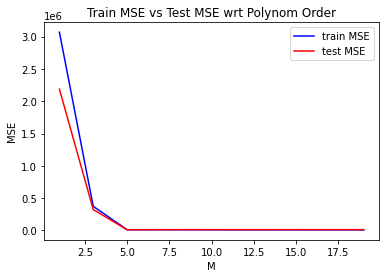

Best M: 5
MSE for 5 order polynomial regression on test data: 11357.227755228132 


In [15]:
# plot train-test errors vs polynomial order
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(m_range, training_errors,color='blue', label = "train MSE")
plt.plot(m_range, testing_errors,color='red', label = "test MSE")
plt.xlabel("M")
plt.ylabel("MSE")
plt.title("Train MSE vs Test MSE wrt Polynom Order")
plt.legend()
plt.show()
print("Best M:", best_m)  
print("MSE for {} order polynomial regression on test data: {} ".format(best_m,minError))  

## Pipeline Usage

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=best_m)),
    ("lin_reg", LinearRegression())
])

poly_regression.fit(x_train[:,np.newaxis], y_train[:,np.newaxis])

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('lin_reg', LinearRegression())])

In [18]:
y_train_hat = poly_regression.predict(x_train[:,np.newaxis])
y_test_hat = poly_regression.predict(x_test[:,np.newaxis])
y_hat = poly_regression.predict(x[:,np.newaxis])

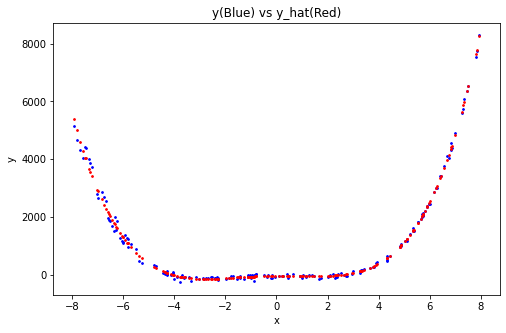

In [19]:
# plot the regression result on generated train dataset
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, s = 3, color='blue')
plt.scatter(x_train, y_train_hat, s = 3, color='red')
plt.title('y(Blue) vs y_hat(Red)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

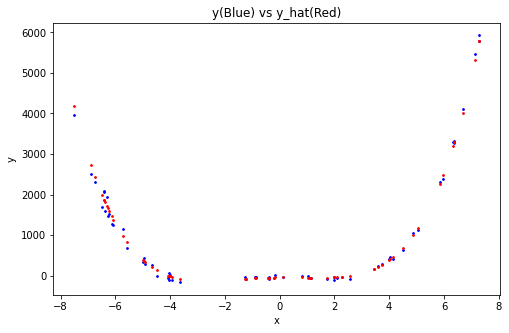

In [20]:
# plot the regression result on generated test dataset
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, s = 3, color='blue')
plt.scatter(x_test, y_test_hat, s = 3, color='red')
plt.title('y(Blue) vs y_hat(Red)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

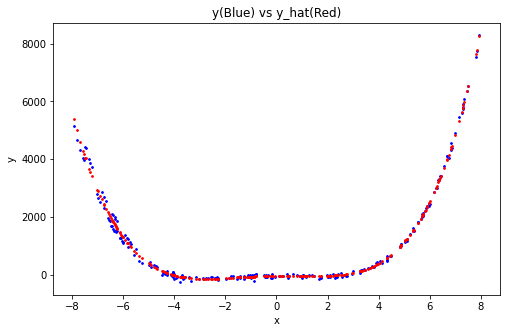

In [21]:
#plot the regression result on the combined dataset
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s = 3, color='blue')
plt.scatter(x, y_hat, s = 3, color='red')
plt.title('y(Blue) vs y_hat(Red)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
print("For ", best_m, "th order polynomial regression")
print("MSE on train data:", mean_squared_error(y_train, y_train_hat)) 
print("MSE on all data:", mean_squared_error(y, y_hat)) 
print("MSE on test data:", mean_squared_error(y_test, y_test_hat)) 

For  5 th order polynomial regression
MSE on train data: 12161.825091249599
MSE on all data: 11959.06656257219
MSE on test data: 11357.227755228132
